**Applied Empirical Analysis (HS 2020)**

**Conny Wunsch, Ulrike Unterhofer and Véra Zabrodina** -- University of Basel

***

# Lab Session 2 - Instrumental Variables (IV)

***


Key ingredients for an IV design:

* An endogenous treatment.
* A variable that is correlated with this treatment but which does not directly affect the outcome (instrument).

## Application: Children and Their Parents' Labor Supply: Evidence from Exogenous Variation in Family Size
**Angrist, J., and W. Evans, American Economic Review 1998**


***
## 1. Introduction


* What is the research question?


* Why is this question of interest?


* What is the treatment and the outcome(s)? 


* Why can you not just regress the outcome on the treatment, i.e. what is the endogeneity problem? 


* Which instrumental variables do the authors use? 



### Notation

* $Z_i\in\{0,1\}$ ... binary instrument:  having  a second child of the same gender as the first child (*samesex*)
* $D_i\in\{0,1\}$ ... binary treatment status: having more than 2 children yes/no (*morekids*)
* $D_{0,i}^*\in\{0,1\}$ ... potential treatment status when $Z_i=0$
* $D_{1,i} ^*\in\{0,1\}$ ... potential treatment status when $Z_i=1$
* $Y_{0,i} ^*$ ... potential outcome under no treatment
* $Y_{1,i} ^*$ ... potential outcome under treatment
* $Y_i$ ... observed outcome 

### What kind of effect do we identify?

We are going to identify a **Local Average Treatment Effect (LATE)**, meaning an effect for those who react to the instrument being *samesex* by having more children.

***

## 2. Identification strategy and assumptions

### Discussion of assumptions

What do these assumptions mean in words?

*	What could invalidate them? Think of concrete examples or mechanisms.
*	Which arguments or evidence can you provide to support that they hold?

**A1 Stable unit treatment value assumption (SUTVA):**

 $Y_{i}=D_{i}Y^*_{1,i}+(1-D_{i})Y^*_{0,i}$
 
 $D_{i}=Z_{i}D^*_{1,i}+(1-Z_{i})D^*_{0,i}$
 
 No spillovers from treated on non-treated and instrumented on non-instrumented.
 
**A2 Relevance / existence of compliers:** 

$Pr(D^*_{1,i}>D^*_{0,i})>0$

Testable by checking the first stage.

**A3 Monotonicity (no defiers):**

$Pr(D^*_{1,i}<D^*_{0,i})=0$

The instrument moves the endogenous variable in one direction.  

**A4 Exclusion restriction:** 

$Y^*_{0,i},Y^*_{1,i},D^*_{0,i},D^*_{1,i}\perp Z_i|X_i$

Captures :
1. The random assignment of the instrument 
2. An exclusion restriction:  there is no direct effect of the instrument on the outcome.

**A5 Common support (testable):**

$Supp(X|Z_i=0)=Supp(X|Z_i=1)$

There are always both individuals with $Z_i=1$ and $Z_i=0$ with the same $X$.

***

## 3. Data

* Census Public Use Micro Samples (PUMS) 1980

    
* We use a random sample covering one third of the observations.


* What is the unit of observation? -- Household/Family.


* What is the time dimension? -- One cross-section.


* Preliminary data prep done by the authors: 

    * Children are matched to female household head or the spouse of a male household head. 
    * Mothers for whom the number of children did not match the reported number were deleted from the data. 




* List of  Variables: 


|Variable name| Description|
|:----|:----|
|**Treatment variables** ||
|*morekids*|        had more than 2 kids |
|*kidcount*|        count of kids in household |
|**Instruments** ||
|*samesex*|        first two kids are of same sex |
|*multi2nd*|        second birth twins |
|**Outcome variables** ||
|*weeksm*|        weeks worked per year mom |
|*hourswm*|        hours per week mom |
|*weeksd*|        weeks worked per year dad |
|*hourswd*|        hours per week dad |
|*workedm*|        worked for pay mom |
|*workedd*|        worked for pay dad |
|*incomem*|        moms labour income (adjusted) |
|*incomed*|        dads labour income (adjusted) |
|*lfaminc*|        log family income (adjusted) |
|*nonmomi*|        income not generated by mum (adjusted) |
|*lnonmomi*|        log income not generated by mum (adjusted) |
|**Other variables** ||
|*ageqk*|        age in quarters, first born  |
|*ageq2nd*|        age in qtrs second kid |
|*ageq3rd*|        age in qtrs of 3rd kid |
|*boy1st*|        first birth boy |
|*boy2nd*|        2nd birth boy |
|*boys2*|        first two births boys |
|*girls2*|        first two births girls |
|*agem*|        age in years of mom |
|*agefstm*|        age of mom when kid first born |
|*agefstd*|        age of dad when kid first born |
|*aged*|        age of dad |
|*blackm*|        =1 if mom black |
|*hispm*|        =1 if mom hispanic |
|*othracem*|        =1 if mom other race (white is ref) |
|*blackd*|        =1 if dad black |
|*hispd*|        =1 if dad hispanic |
|*othraced*|        =1 if dad other race (white is ref) |
|*educm*|        moms education |
|*faminc*|        family income (adjusted) |
|*msample*|        married sample |


***
## 4. Empirical Analysis

### Load Packages

In [1]:
# Empty working space
rm(list=ls())

#Load Packages
# Define packages that you need
packages_vector <- c( "haven", "dplyr",  "sandwich",  "jtools",
                     "fBasics",  "xtable",  "stargazer", "AER", 
                     "data.table", "causalweight", "tidyverse")
lapply(packages_vector, require, character.only = TRUE) 

# !!! Uncomment the 3 lines below to install packages (first time only) 
# and set working directory if you run this on your computer !!!
#install.packages(packages_vector) 
#work_dir <- "C:/Users/unterhof/Desktop"
#setwd(work_dir)


# Function for table display
repr_html.xtable <- function(obj, ...){
    paste(capture.output(print(obj, type = 'html')), collapse="", sep="")
}


Loading required package: haven

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: sandwich

Loading required package: jtools

Loading required package: fBasics

Loading required package: timeDate

Loading required package: timeSeries

Loading required package: xtable


Attaching package: 'xtable'


The following object is masked from 'package:timeSeries':

    align


The following object is masked from 'package:timeDate':

    align


Loading required package: stargazer


Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 


Loading required package: AER

Loading required package: car

Loading required package: carData


Attaching package: 'car'


T

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

### Read in the data

In [2]:
# Random sample of 1980 PUMS data (1/3 of observations)
data <-read_dta("AngristEvans1980_sample.dta")

# Inspect
head(data)

morekids,kidcount,samesex,multi2nd,ageqk,ageq2nd,ageq3rd,boy1st,boy2nd,boys2,...,weeksd,hourswd,workedm,workedd,incomem,incomed,lfaminc,nonmomi,lnonmomi,msample
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,1,0,57,51,47,1,1,1,...,52,50,1,1,6790.827,33345.371,10.60003,33345.371,10.41467,1
0,1,0,1,5,NA,0,0,0,0,...,52,40,0,1,0.000,46192.312,10.76348,47262.891,10.76348,1
0,2,1,0,38,13,0,0,0,0,...,45,40,1,1,10506.363,50390.660,11.02295,50758.016,10.83482,0
0,2,0,0,51,38,0,0,1,0,...,52,46,0,1,0.000,115465.039,11.65672,115465.039,11.65672,1
1,3,1,0,41,37,8,1,1,1,...,48,40,0,1,0.000,5048.512,8.54946,5163.967,8.54946,1
0,2,0,0,18,6,0,1,0,0,...,50,52,1,1,20750.330,32547.686,10.88365,32547.686,10.39046,1


### Sample selection

In [3]:
# Number of observations before sample selection
print("Sample size before sample restrictions:")
nrow(data)

# only keep women aged 21-35, who were older than 15 at first birth
data <- dplyr::filter(data, agem >= 21 & agem <= 35)
data <- dplyr::filter(data, agefstm >= 15)

# who have 2 or more children
data <- dplyr::filter(data, kidcount >= 2)

# second child older than 1 
data <- dplyr::filter(data, ageq2nd > 4) 

# Number of observations after sample selection
print("Sample size after sample restrictions:")
nrow(data)


[1] "Sample size before sample restrictions:"


[1] 440623

[1] "Sample size after sample restrictions:"


[1] 197071

Note: A correct mapping of children to households is only possible for relatively young children. The census does not allow to track children across households.


* What does the sample selection insure?


* What does the sample selection mean for the representativeness?

### Define Variables of Interest

In [4]:
# Endogenous Variable
data$d <- data$morekids # has more than 2 kids

# Instrument
data$z <- data$samesex # first two kids are of same sex

# Store each variable in own R object 
attach(data) 

# Labour market outcomes (mother)
y_mat <- cbind(workedm, weeksm, hourswm, incomem, lfaminc)
y_names<- c("workedm", "weeksm", "hourswm", "incomem", "lfaminc")

# Covariates (name vector)
x_desc_names<-c("kidcount", "morekids", "boy1st", "boy2nd", "boys2", 
                "girls2", "samesex", "multi2nd", "agem" ,"aged", 
                "agefstm", "agefstd", "workedm", "workedd", "weeksm", 
                "weeksd", "hourswm", "hourswd", "incomem", "incomed", 
                "faminc", "nonmomi") 


### Descriptive Statistics

We replicate Table 2 (page 445) for the 1980 data using the whole sample

In [5]:
# Descriptives based on x_desc_names
desc <- fBasics::basicStats(data[x_desc_names]) %>% 
                t() %>% 
                as.data.frame() %>% 
                dplyr::select(Mean, Stdev, nobs)

print(round(desc, digits=3))

              Mean     Stdev   nobs
kidcount     2.552     0.807 197071
morekids     0.402     0.490 197071
boy1st       0.511     0.500 197071
boy2nd       0.510     0.500 197071
boys2        0.263     0.440 197071
girls2       0.242     0.428 197071
samesex      0.505     0.500 197071
multi2nd     0.009     0.093 197071
agem        30.129     3.507 197071
aged        32.954     4.976 197071
agefstm     20.142     2.953 197071
agefstd     23.580     4.475 197071
workedm      0.566     0.496 197071
workedd      0.978     0.148 197071
weeksm      20.811    22.271 197071
weeksd      47.439    11.173 197071
hourswm     18.804    18.917 197071
hourswd     43.169    12.560 197071
incomem   7162.109 10829.388 197071
incomed  37428.423 24661.649 197071
faminc   42368.075 26635.494 197071
nonmomi  35443.030 25857.905 197071


### Check balancedness of covariates

We compare the average characteristics of individuals with and without children of the same gender to provide supporting evidence for the randomness of our instrument. 

See Table 4, page 459.

In [6]:
# Define a vector of covariates
x_diff <- cbind(agem, agefstm, blackm, hispm, othracem, educm)
x_names <- colnames(x_diff)

# Define a function estimating the differences across samesex
balance_check.model <- function(x){
    
    # Conditional means
    mean_z0 <- mean(x[z==0])
    mean_z1 <- mean(x[z==1])
    
    # Difference in means
    diff_z <- lm(x ~ z)
    cov <- vcovHC(diff_z, type = "HC")
    robust.se <- sqrt(diag(cov))
    
    list(mean_z0 = mean_z0, mean_z1 = mean_z1,
        diff = diff_z$coefficients[2], 
        robust.se = robust.se[2], 
        pval = 2*pnorm(-abs(diff_z$coefficients[2]/robust.se[2])) )             
}

diff_output <- apply(x_diff, 2, balance_check.model)

# convert list to table
diff_output<-rbindlist(diff_output)
rownames(diff_output)<- x_names
colnames(diff_output)<- c("E(X|Z=0)", "E(X|Z=1)", "Difference", "s.e.", "p-value")

# plot table
print("Difference in means for demographic variables by same sex")
xtable(diff_output, digits=3)


[1] "Difference in means for demographic variables by same sex"


,E(X|Z=0),E(X|Z=1),Difference,s.e.,p-value
agem,30.136,30.122,-0.013,0.016,0.405
agefstm,20.135,20.150,0.015,0.013,0.253
blackm,0.119,0.120,0.001,0.001,0.558
hispm,0.030,0.030,0.001,0.001,0.469
othracem,0.029,0.028,-0.001,0.001,0.167
educm,12.135,12.127,-0.008,0.011,0.449


### First stage

We estimate the first stage parametrically. First, without then, adding controls for the gender of the first two children and some demographic variables:

(1) $D_i=\alpha_1+\pi_1Z_i+\varepsilon_{1,i}$

(2) $D_i=\alpha_1+\pi_1Z_i+X_i'\beta_1+\varepsilon_{1,i}$

See Table 6, page 462 in the paper.


In [7]:
# First stage regression w/o controls
ols.m.morekids.1 <- lm(d ~ samesex )
cov <- vcovHC(ols.m.morekids.1, type = "HC")
robust.se.morekids.1 <- sqrt(diag(cov))

# define vector of controls
x <- cbind(boy1st, boy2nd, agem, agefstm, blackm, hispm, othracem)

# First stage regression w/ controls
ols.m.morekids.2 <- lm(d ~ samesex + x)
cov <- vcovHC(ols.m.morekids.2, type = "HC")
robust.se.morekids.2 <- sqrt(diag(cov))

# Output Coefficients
stargazer(ols.m.morekids.1,ols.m.morekids.2, 
          se=list(robust.se.morekids.1, robust.se.morekids.2), 
          type="text",
          keep=c("boy1st", "boy2nd", "samesex"), 
          keep.stat = c("n", "rsq", "f"), 
          align=TRUE, dep.var.labels = c("More than two children"), 
          dep.var.labels.include = TRUE)


                                Dependent variable:                   
             ---------------------------------------------------------
                              More than two children                  
                         (1)                          (2)             
----------------------------------------------------------------------
samesex               0.057***                     0.059***           
                       (0.002)                      (0.002)           
                                                                      
xboy1st                                            -0.010***          
                                                    (0.002)           
                                                                      
xboy2nd                                            -0.009***          
                                                    (0.002)           
                                                                      
-----

* Why do we control for the gender of the first two children?


* Why do we include additional control variables?


* How do we interpret this first stage?


### Wald estimate - Nonparametric LATE

We estimate the following

$$ \text{LATE}=\frac{E[Y|Z=1]-E[Y|Z=0]}{E[D|Z=1]-E[D|Z=0]}$$


We compute the Wald estimate exemplarily for *workedm*, based on the full sample. 

See Table 5 (first 2 columns).

In [8]:
# Conditional outcomes (for participation decision)
E_workedm_1 = mean(workedm[z==1])
E_workedm_0 = mean(workedm[z==0])

# Conditional treatment
E_d_1 = mean(d[z==1])
E_d_0 = mean(d[z==0])

# Difference in conditional outcomes
diff_workedm = E_workedm_1 - E_workedm_0

# Difference in conditional treatment = FIRST STAGE
diff_d = E_d_1 - E_d_0 

#########################
#  Wald Estimate / LATE #
#########################
wald_workedm = diff_workedm/diff_d 

# Present results in simple table
tab_wald <- rbind(cbind(E_workedm_1, E_workedm_0, diff_workedm), 
                  cbind(E_d_1, E_d_0, diff_d), 
                  cbind(NA, NA, wald_workedm))
colnames(tab_wald) <- c("Z=1", "Z=0", "Difference")
rownames(tab_wald) <- c("E(Y|Z)", "E(D|Z)", "Wald estimator")

print("Wald estimate for the effect of children on the labour force participation of women")
xtable(tab_wald, digits =3)

[1] "Wald estimate for the effect of children on the labour force participation of women"


,Z=1,Z=0,Difference
E(Y|Z),0.562,0.570,-0.007
E(D|Z),0.431,0.373,0.057
Wald estimator,,,-0.128


How do we interpret this effect?

What about inference?

### Reduced-Form

Reduced-form regression of $Y$ on $Z$:

$Y_i=\alpha_0+\pi_0Z_i+X_i'\beta_0+\varepsilon_{0,i}$

In [9]:
# Define function for several outcomes
itt.model <- function(y){
        itt.m <- lm(y ~ z + x)
        cov <- vcovHC(itt.m, type = "HC")
        robust.se <- sqrt(diag(cov))
        
    list(itt.coeff = itt.m$coefficients[2], 
         robust.se = robust.se[2], 
         pval = 2*pnorm(-abs(itt.m$coefficients[2]/robust.se[2])) )
}

itt_output <- apply(y_mat, 2, itt.model)

# convert list to table
itt_output<-rbindlist(itt_output)
rownames(itt_output)<- y_names

# plot table
print("Reduced form estimates of labour supply models")
xtable(itt_output, digits=3)

[1] "Reduced form estimates of labour supply models"


,itt.coeff,robust.se,pval
workedm,-0.007,0.002,0.002
weeksm,-0.241,0.098,0.014
hourswm,-0.226,0.084,0.007
incomem,-91.480,47.897,0.056
lfaminc,0.003,0.006,0.575


The reduced form gives an unbiased estimate of the effect of the instrument on the outcomes. It is not very informative in this context but can be, e.g. if the instrument is a policy variable in which case it is the policy effect. It is also referred to as intention to treat effect (ITT).

### OLS

We estimate the *naive* regression of having more children on labour supply which is also shown by the authors in  (Table 7, column 1, page 465):

$Y_i=\alpha_0+\zeta_0D_i+X_i'\beta_0+\varepsilon_{0,i}$

In [10]:
# Define function for several outcomes

ols.model <- function(y){
    
    ols.m <- lm(y ~ d + x)
    cov <- vcovHC(ols.m, type = "HC")
    robust.se <- sqrt(diag(cov))
    
    list(ols.coeff = ols.m$coefficients[2], 
         robust.se = robust.se[2], 
         pval = 2*pnorm(-abs(ols.m$coefficients[2]/robust.se[2])))
}

ols_output <- apply(y_mat, 2, ols.model)

# convert list to table
ols_output<-rbindlist(ols_output)
rownames(ols_output)<- y_names

# plot table
print("OLS estimates of labour supply models")
xtable(ols_output, digits=3)

[1] "OLS estimates of labour supply models"


,ols.coeff,robust.se,pval
workedm,-0.173,0.002,0.000
weeksm,-8.861,0.100,0.000
hourswm,-6.520,0.087,0.000
incomem,-3718.223,48.955,0.000
lfaminc,-0.134,0.006,0.000


### Two-stage least squares (2SLS)

The 2SLS estimation is the parametric version of the IV estimation. It imposes a specific functional form on the outcome and treatment equations.

2SLS first extracts the exogenous variation from $D$ (first stage from before):

$D_i=\alpha_1+\pi_1Z_i+X_i'\beta_1+\varepsilon_{1,i}$

Then, replace endogenous treatment $D$ in the outcome equation by the predicted $\hat{D}_i$ obtained from this first stage: 

$Y_i=\alpha_2+\pi_2\hat{D}_i+X_i'\beta_2+\varepsilon_{2,i}$


We apply a package (`ivreg`) that directly integrates these two steps and gives you standard errors correcting for the first stage estimation. Note that the package does not allow you to show the results of the first stage estimation. 

(1) We first estimate the effect on the labour supply decision of the women to demonstrate the application of the package:

In [11]:
# ivreg package exemplarily for workedm
iv.m <- ivreg(workedm ~ d + x  | z + x)
summary(iv.m, vcov = sandwich, diagnostics = TRUE)

# Important for coding: Endogenous variables (d) can only appear before the vertical line; 
# instruments (z) can only appear after the vertical line; 
# exogenous regressors that are not instruments (x) must appear both before and after the vertical line.


Call:
ivreg(formula = workedm ~ d + x | z + x)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9272 -0.5178  0.3002  0.4313  0.7288 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.4612828  0.0180108  25.612  < 2e-16 ***
d           -0.1150971  0.0370254  -3.109  0.00188 ** 
xboy1st     -0.0001912  0.0022003  -0.087  0.93076    
xboy2nd     -0.0042123  0.0021967  -1.918  0.05517 .  
xagem        0.0222252  0.0011698  19.000  < 2e-16 ***
xagefstm    -0.0262497  0.0017176 -15.283  < 2e-16 ***
xblackm      0.1041820  0.0042507  24.509  < 2e-16 ***
xhispm      -0.0391096  0.0086700  -4.511 6.46e-06 ***
xothracem    0.0401819  0.0070451   5.704 1.18e-08 ***

Diagnostic tests:
                    df1    df2 statistic p-value    
Weak instruments      1 197062   773.301  <2e-16 ***
Wu-Hausman            1 197061     2.471   0.116    
Sargan                0     NA        NA      NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 '

(2) We then define a function for several outcomes and combine the 2SLS results with the OLS estimates:

In [12]:
# Define 2sls function for several outcomes
tsls.model <- function(y){
        iv.m <- ivreg(y ~ d + x  | z + x)
        iv_sum <-summary(iv.m, vcov = sandwich)
    
        list( iv.coeff = iv_sum$coefficients[2,1], 
             robust.se = iv_sum$coefficients[2,2], 
             pval = 2*pnorm(-abs(iv_sum$coefficients[2,1]/iv_sum$coefficients[2,2])))
 }

iv_output <- apply(y_mat, 2, tsls.model)

# convert list to table
iv_output<-rbindlist(iv_output)

# join OLS and IV output
output<-cbind(ols_output,iv_output)
rownames(output)<- y_names

# plot table
print("OLS and 2SLS estimates of labour supply models")
xtable(output, digits=3)

[1] "OLS and 2SLS estimates of labour supply models"


,ols.coeff,robust.se,pval,iv.coeff,robust.se,pval
workedm,-0.173,0.002,0.000,-0.115,0.037,0.002
weeksm,-8.861,0.100,0.000,-4.101,1.649,0.013
hourswm,-6.520,0.087,0.000,-3.847,1.405,0.006
incomem,-3718.223,48.955,0.000,-1555.290,807.002,0.054
lfaminc,-0.134,0.006,0.000,0.056,0.100,0.576


The corresponding results in the paper can be found in Table 7, column 1-2, page 465.

What do we learn from comparing OLS to IV estimates?

***

## Extensions

### Semiparametric LATE using IPW

**Roadmap based on Frölich (2007):**
1. Estimate a probit model for $Pr(Z_i = 1| X_i = x)$ and calculate predicted probabilities $\hat{p}(X_i)$.


2. Calculate the LATE by reweighting observations by the inverse of their conditional instrument probabilities. 

$$\text{LATE}=\frac{E\left[\frac{Y_i Z_i}{\hat{p}(X_i)}-\frac{Y_i(1-Z_i)}{(1-\hat{p}(X_i))}\right]}{E\left[\frac{D_i Z_i}{\hat{p}(X_i)}-\frac{D_i (1-Z_i)}{(1-\hat{p}(X_i))}\right]}$$

3. Bootstrap everything for inference.


**First, manually estimate the p-scores**

In [13]:
# estimate pscores manually
pscore.model <- glm(z ~ x, family = binomial(link = "probit"))
summ(pscore.model, , robust = "HC1")

MODEL INFO:
Observations: 197071
Dependent Variable: z
Type: Generalized linear model
  Family: binomial 
  Link function: probit 

MODEL FIT:
<U+03C7>²(7) = 177.95, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.00
Pseudo-R² (McFadden) = 0.00
AIC = 273015.37, BIC = 273096.90 

Standard errors: Robust, type = HC1
------------------------------------------------
                     Est.   S.E.   z val.      p
----------------- ------- ------ -------- ------
(Intercept)         -0.04   0.03    -1.50   0.13
xboy1st              0.05   0.01     8.86   0.00
xboy2nd              0.05   0.01     9.57   0.00
xagem               -0.00   0.00    -1.40   0.16
xagefstm             0.00   0.00     1.76   0.08
xblackm              0.01   0.01     0.84   0.40
xhispm               0.01   0.02     0.73   0.46
xothracem           -0.02   0.02    -1.38   0.17
------------------------------------------------

**Check common support**

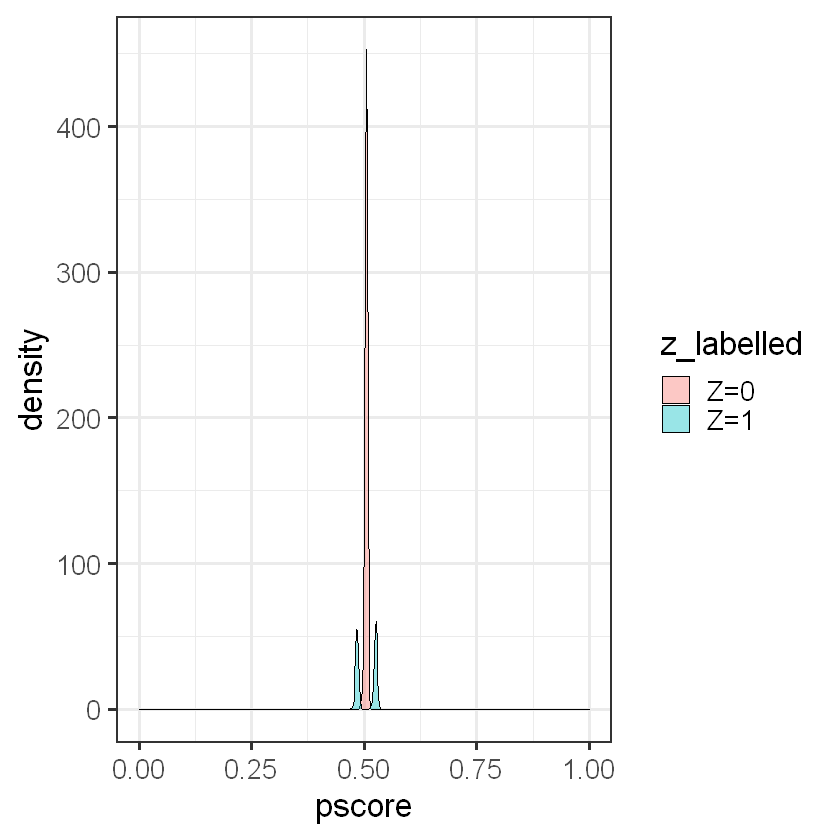

In [14]:
# add pscore to data frame and generate a labelled factor variable
data$pscore <- pscore.model$fitted.values 

data$z_labelled <- factor(z, 
                          levels = c(0,1), 
                          label = c("Z=0", "Z=1")) 

# Check for common support in propensity score 
ggplot(data, aes(x = pscore, fill = z_labelled)) + 
                        geom_density(alpha=0.4)  + 
                        theme_bw(base_size = 20) +
                                         xlim(0, 1)

Here Xs are orthogonal to $Z$.

**Estimate the semiparametric LATE using the** `causalweight` **package which implements all of the above mentionned steps:**

For more details, see https://cran.r-project.org/web/packages/causalweight/index.html

In [15]:
# Exemplarily for the labour supply decision
late_workedm <- lateweight(y=workedm, 
                           d=d, 
                           z=z, 
                           x=x, 
                           LATT=FALSE, # for LATE
                           logit=FALSE, 
                           boot=2)
# increase boot to 199 or higher!

# Display results
cat("LATE: ",round(c(late_workedm$effect),3),", standard error: ",
                    + round(c(late_workedm$se.effect),3), ", p-value: ",
                    + round(c(late_workedm$pval.effect),3))

LATE:  -0.115 , standard error:  0.023 , p-value:  0

In [16]:
# For all outcomes
sp.model <- function(y){
      sp.m <- lateweight(y=y, 
                         d=d, 
                         z=z, 
                         x=x, 
                         LATT=FALSE, # for LATE
                         logit=FALSE,
                         boot=9)
      list( sp.iv.coeff = sp.m$effect, 
            boot.se = sp.m$se.effect, 
            pval = sp.m$pval.effect)
}
# increase boot to high number

sp.iv_output <- apply(y_mat, 2, sp.model)

# convert list to table
sp.iv_output<-rbindlist(sp.iv_output)

# join with OLS and IV output
output_all<-cbind(output, sp.iv_output)
rownames(output_all)<- y_names

# plot table
print("OLS, 2SLS and semiparametric LATE estimates of labour supply models")
xtable(output_all, digits=3)

[1] "OLS, 2SLS and semiparametric LATE estimates of labour supply models"


,ols.coeff,robust.se,pval,iv.coeff,robust.se,pval,sp.iv.coeff,boot.se,pval
workedm,-0.173,0.002,0.000,-0.115,0.037,0.002,-0.115,0.030,0.000
weeksm,-8.861,0.100,0.000,-4.101,1.649,0.013,-4.102,1.932,0.034
hourswm,-6.520,0.087,0.000,-3.847,1.405,0.006,-3.848,1.287,0.003
incomem,-3718.223,48.955,0.000,-1555.290,807.002,0.054,-1555.335,550.831,0.005
lfaminc,-0.134,0.006,0.000,0.056,0.100,0.576,0.056,0.102,0.581


Is it surprising that the semiparametric IV estimates do so closely match the parametric ones?

***

## References

Frölich M (2007). Nonparametric IV Estimation of Local Average Treatment Effects with
Covariates. *Economics Letters*, 139, 35-75.
